# import pandas as pd

df = pd.read_csv('./dataset/COVID-19.csv')
df

In [91]:
#Divide Dataset Into Continents 

North_America = df['continent'] == 'North America'
northAmerica = df[North_America]

South_America = df['continent'] ==  'South America'
southAmerica = df[South_America]

Asia = df['continent'] == 'Asia'
asia = df[Asia]

Africa = df['continent'] == 'Africa'
africa = df[Africa]

Antartica = df['continent'] == 'Antartica'
antartica = df[Antartica]

Australia = df['continent'] == 'Oceania'
australia = df[Australia]

Europe = df['continent'] == 'Europe'
europe = df[Europe]

print(northAmerica)

      iso              country       date  \
257    AG  Antigua and Barbuda  2/15/2020   
258    AG  Antigua and Barbuda  2/16/2020   
259    AG  Antigua and Barbuda  2/17/2020   
260    AG  Antigua and Barbuda  2/18/2020   
261    AG  Antigua and Barbuda  2/19/2020   
...    ..                  ...        ...   
18886  US        United States  7/10/2020   
18887  US        United States  7/11/2020   
18888  US        United States  7/12/2020   
18889  US        United States  7/13/2020   
18890  US        United States  7/14/2020   

       grocery_and_pharmacy_percent_change_from_baseline  \
257                                                 -1.0   
258                                                 -2.0   
259                                                 -3.0   
260                                                 -6.0   
261                                                 -1.0   
...                                                  ...   
18886                                  

In [3]:
northAmericaGDP = round(northAmerica['gdp_ppp_per_capita'].mean(skipna = True), 2)
southAmericaGDP = round(southAmerica['gdp_ppp_per_capita'].mean(skipna = True), 2)
asiaGDP = round(asia['gdp_ppp_per_capita'].mean(skipna = True), 2)
antarticaGDP = round(antartica['gdp_ppp_per_capita'].mean(skipna = True), 2)
africaGDP = round(africa['gdp_ppp_per_capita'].mean(skipna = True), 2)
australiaGDP = round(australia['gdp_ppp_per_capita'].mean(skipna = True), 2)
europeGDP = round(europe['gdp_ppp_per_capita'].mean(skipna = True), 2)

print("Averages of GDP by continent:")
print(northAmericaGDP)
print(southAmericaGDP)
print(asiaGDP)
print(africaGDP)
print(australiaGDP)
print(europeGDP)

Averages of GDP by continent:
20942.82
16460.02
29306.95
6884.72
26971.13
39248.06


In [4]:
#Get Records Where Countries Are Greater Than The Average
northAmericaHigh = northAmerica['gdp_ppp_per_capita'] > northAmericaGDP
southAmericaHigh = southAmerica['gdp_ppp_per_capita'] > southAmericaGDP
asiaHigh = asia['gdp_ppp_per_capita'] > asiaGDP
africaHigh = africa['gdp_ppp_per_capita'] > africaGDP
australiaHigh = australia['gdp_ppp_per_capita'] > australiaGDP
europeHigh = europe['gdp_ppp_per_capita'] > europeGDP


print(europe[europeHigh])

      iso  country       date  \
710    AT  Austria  2/15/2020   
711    AT  Austria  2/16/2020   
712    AT  Austria  2/17/2020   
713    AT  Austria  2/18/2020   
714    AT  Austria  2/19/2020   
...    ..      ...        ...   
16621  SE   Sweden  7/10/2020   
16622  SE   Sweden  7/11/2020   
16623  SE   Sweden  7/12/2020   
16624  SE   Sweden  7/13/2020   
16625  SE   Sweden  7/14/2020   

       grocery_and_pharmacy_percent_change_from_baseline  \
710                                                  1.0   
711                                                 21.0   
712                                                  5.0   
713                                                  5.0   
714                                                  2.0   
...                                                  ...   
16621                                               -4.0   
16622                                               -2.0   
16623                                                0.0   
166

In [5]:
#Get Records Where Countries Are Lower Than The Average
northAmericaLow = northAmerica['gdp_ppp_per_capita'] < northAmericaGDP
southAmericaLow = southAmerica['gdp_ppp_per_capita'] < southAmericaGDP
asiaLow = asia['gdp_ppp_per_capita'] < asiaGDP
africaLow = africa['gdp_ppp_per_capita'] < africaGDP
australiaLow = australia['gdp_ppp_per_capita'] < australiaGDP
europeLow = europe['gdp_ppp_per_capita'] < europeGDP

print(europe[europeLow])

      iso                 country       date  \
1163   BA  Bosnia and Herzegovina  2/15/2020   
1164   BA  Bosnia and Herzegovina  2/16/2020   
1165   BA  Bosnia and Herzegovina  2/17/2020   
1166   BA  Bosnia and Herzegovina  2/18/2020   
1167   BA  Bosnia and Herzegovina  2/19/2020   
...    ..                     ...        ...   
18584  UA                 Ukraine  7/10/2020   
18585  UA                 Ukraine  7/11/2020   
18586  UA                 Ukraine  7/12/2020   
18587  UA                 Ukraine  7/13/2020   
18588  UA                 Ukraine  7/14/2020   

       grocery_and_pharmacy_percent_change_from_baseline  \
1163                                                 6.0   
1164                                                10.0   
1165                                                 2.0   
1166                                                 7.0   
1167                                                 2.0   
...                                                  ...   
185

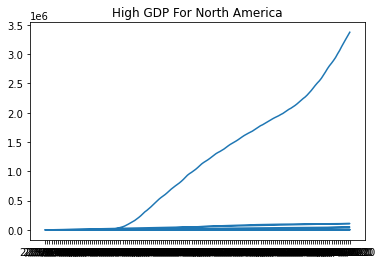

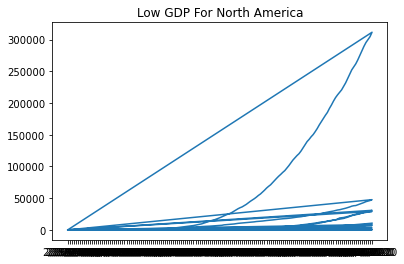

In [6]:
import matplotlib.pyplot as plt

x = (northAmerica[northAmericaHigh]['date'])
y = (northAmerica[northAmericaHigh]['confirmed_cases'])

x1 = (northAmerica[northAmericaLow]['date'])
y1 = (northAmerica[northAmericaLow]['confirmed_cases'])

from matplotlib import pyplot as plt

# First plot
ax = plt.subplot()
plt.plot( x,y ) # Scatter plot 1 data
plt.title('High GDP For North America')
plt.show()

# Second plot
ax = plt.subplot()
plt.plot( x1, y1 ) # Scatter plot 2 data
plt.title('Low GDP For North America')
plt.show()

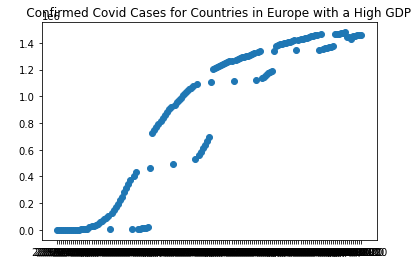

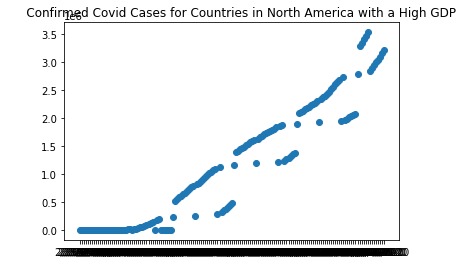

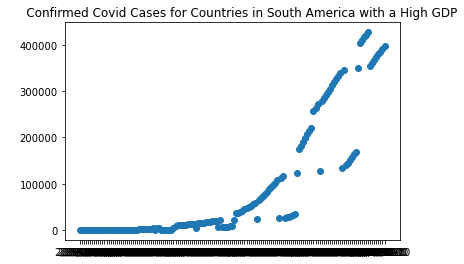

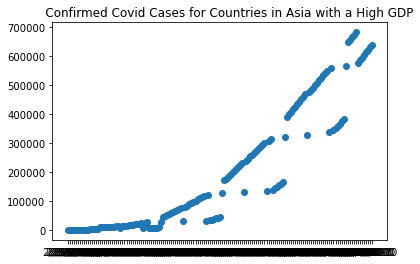

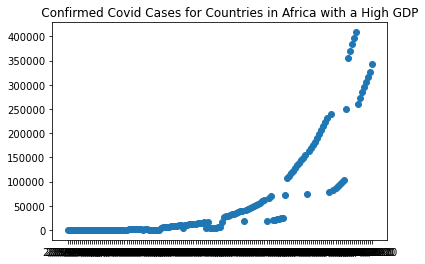

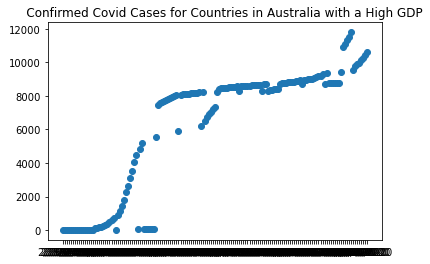

In [7]:
import numpy as np

def covid_by_date(country, countryHigh,continent):
    y = country[countryHigh].groupby(['date'])['confirmed_cases'].sum()
    x = country[countryHigh]['date'].unique()
   
    
    total_cases = []
    
    for size in range(len(y)):
        total_cases.append(y[size])
        
    case_count = np.array(total_cases)
    
    from matplotlib import pyplot as plt
    
    # First plot
    ax = plt.subplot()
    plt.scatter( x, case_count ) # Scatter plot 1 data
    plt.title('     Confirmed Covid Cases for Countries in '+continent+' with a High GDP')
    return(plt.show())

covid_by_date(europe,europeHigh,'Europe')
covid_by_date(northAmerica, northAmericaHigh,'North America')
covid_by_date(southAmerica, southAmericaHigh, 'South America')
covid_by_date(asia, asiaHigh, 'Asia')
covid_by_date(africa, africaHigh, 'Africa')
covid_by_date(australia, australiaHigh, 'Australia')

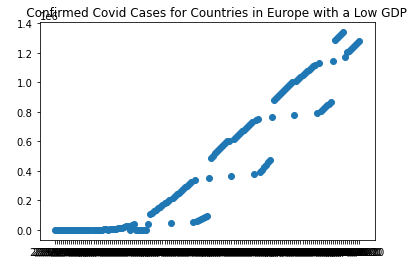

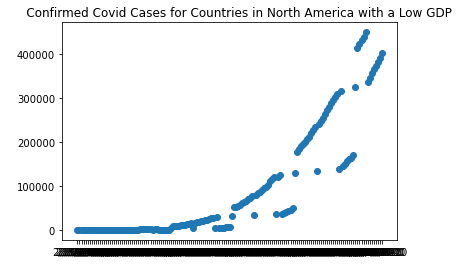

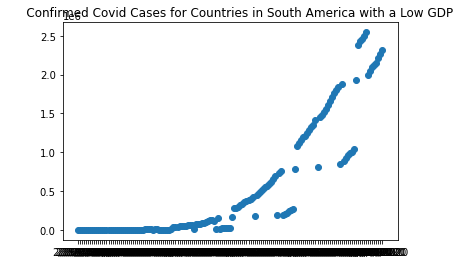

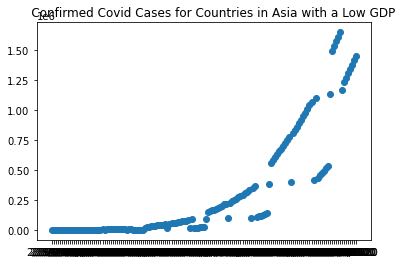

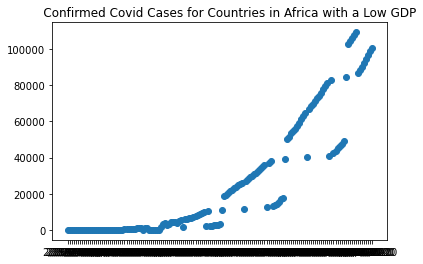

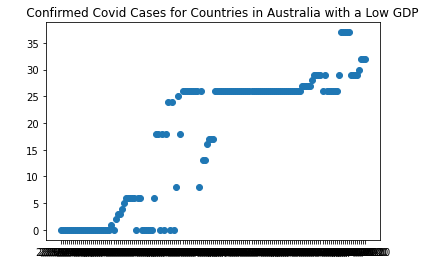

In [8]:
import numpy as np

def covid_by_date(country, countryLow,continent):
    y = country[countryLow].groupby(['date'])['confirmed_cases'].sum()
    x = country[countryLow]['date'].unique()
   
    
    total_cases = []
    
    for size in range(len(y)):
        total_cases.append(y[size])
        
    case_count = np.array(total_cases)
    
    from matplotlib import pyplot as plt
    
    # First plot
    ax = plt.subplot()
    plt.scatter( x, case_count ) # Scatter plot 1 data
    plt.title('     Confirmed Covid Cases for Countries in '+continent+' with a Low GDP')
    return(plt.show())

covid_by_date(europe,europeLow,'Europe')
covid_by_date(northAmerica, northAmericaLow,'North America')
covid_by_date(southAmerica, southAmericaLow, 'South America')
covid_by_date(asia, asiaLow, 'Asia')
covid_by_date(africa, africaLow, 'Africa')
covid_by_date(australia, australiaLow, 'Australia')

In [181]:
Mexico = northAmerica[northAmericaLow][northAmerica[northAmericaLow]['country']=='Mexico']
UnitedStates = northAmerica[northAmericaHigh][northAmerica[northAmericaHigh]['country']=='United States']
Canada = northAmerica[northAmericaHigh][northAmerica[northAmericaHigh]['country']=='Canada']
PuertoRico = northAmerica[northAmericaHigh][northAmerica[northAmericaHigh]['country']=='Puerto Rico']

,iso,country,date,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,gov_response_stringency_index,total_tests,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index,continent
15010,PR,Puerto Rico,2/15/2020,0.0,9.0,0.0,2.0,-4.0,-3.0,0,0,0.028,NaN,39540.59,2874636.0,323.0,NaN,18.67,NaN,North America
15011,PR,Puerto Rico,2/16/2020,-2.0,10.0,-1.0,0.0,-2.0,-4.0,0,0,0.028,NaN,39540.59,2874636.0,323.0,NaN,18.67,NaN,North America
15012,PR,Puerto Rico,2/17/2020,-5.0,16.0,8.0,-3.0,-8.0,-27.0,0,0,0.028,NaN,39540.59,2874636.0,323.0,NaN,18.67,NaN,North America
15013,PR,Puerto Rico,2/18/2020,2.0,3.0,-1.0,-2.0,5.0,8.0,0,0,0.028,NaN,39540.59,2874636.0,323.0,NaN,18.67,NaN,North America
15014,PR,Puerto Rico,2/19/2020,-3.0,4.0,-1.0,-2.0,7.0,8.0,0,0,0.028,NaN,39540.59,2874636.0,323.0,NaN,18.67,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15156,PR,Puerto Rico,7/10/2020,-11.0,-8.0,12.0,-18.0,-35.0,-26.0,8714,157,0.667,NaN,39540.59,2874636.0,323.0,NaN,18.67,NaN,North America
15157,PR,Puerto Rico,7/11/2020,-12.0,-5.0,8.0,-17.0,-34.0,-13.0,8714,157,0.667,NaN,39540.59,2874636.0,323.0,NaN,18.67,NaN,North America
15158,PR,Puerto Rico,7/12/2020,-23.0,-17.0,8.0,-24.0,-34.0,-18.0,8714,157,0.667,NaN,39540.59,2874636.0,323.0,NaN,18.67,NaN,North America
15159,PR,Puerto Rico,7/13/2020,-10.0,-7.0,10.0,-11.0,-29.0,-24.0,8714,157,0.667,NaN,39540.59,2874636.0,323.0,NaN,18.67,NaN,North America


In [189]:
Brazil = southAmerica[southAmericaLow][southAmerica[southAmericaLow]['country']=='Brazil']
Argentina = southAmerica[southAmericaHigh][southAmerica[southAmericaHigh]['country']=='Argentina']

,iso,country,date,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,gov_response_stringency_index,total_tests,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index,continent
559,AR,Argentina,2/15/2020,-3.0,-3.0,0.0,1.0,4.0,-1.0,0,0,0.111,NaN,20610.57,45111229.0,17.0,0.83,11.12,0.722,South America
560,AR,Argentina,2/16/2020,-6.0,-14.0,2.0,-6.0,-2.0,-4.0,0,0,0.111,NaN,20610.57,45111229.0,17.0,0.83,11.12,0.722,South America
561,AR,Argentina,2/17/2020,-8.0,-23.0,1.0,-10.0,-2.0,7.0,0,0,0.111,NaN,20610.57,45111229.0,17.0,0.83,11.12,0.722,South America
562,AR,Argentina,2/18/2020,3.0,-2.0,-1.0,3.0,9.0,9.0,0,0,0.111,NaN,20610.57,45111229.0,17.0,0.83,11.12,0.722,South America
563,AR,Argentina,2/19/2020,0.0,10.0,-2.0,1.0,8.0,11.0,0,0,0.111,NaN,20610.57,45111229.0,17.0,0.83,11.12,0.722,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,AR,Argentina,7/10/2020,-23.0,-84.0,24.0,-65.0,-65.0,-50.0,94047,1774,0.926,445733.0,20610.57,45111229.0,17.0,0.83,11.12,0.722,South America
706,AR,Argentina,7/11/2020,-12.0,-82.0,18.0,-59.0,-52.0,-19.0,97496,1810,NaN,456042.0,20610.57,45111229.0,17.0,0.83,11.12,0.722,South America
707,AR,Argentina,7/12/2020,-34.0,-83.0,18.0,-70.0,-62.0,-20.0,100153,1845,NaN,466308.0,20610.57,45111229.0,17.0,0.83,11.12,0.722,South America
708,AR,Argentina,7/13/2020,-16.0,-81.0,16.0,-56.0,-54.0,-27.0,103252,1903,NaN,474422.0,20610.57,45111229.0,17.0,0.83,11.12,0.722,South America


In [201]:
Italy = europe[europeHigh][europe[europeHigh]['country']=='Italy']
Spain = europe[europeHigh][europe[europeHigh]['country']=='Spain']
Russia = europe[europeLow][europe[europeLow]['country']=='Russia']
Ukraine = europe[europeLow][europe[europeLow]['country']=='Ukraine']
Russia

,iso,country,date,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,gov_response_stringency_index,total_tests,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index,continent
16022,RU,Russia,2/15/2020,8.0,1.0,-1.0,10.0,8.0,1.0,2,0,0.083,NaN,27588.13,145922010.0,9.0,0.824,14.67,0.544,Europe
16023,RU,Russia,2/16/2020,7.0,3.0,0.0,8.0,6.0,3.0,2,0,0.083,NaN,27588.13,145922010.0,9.0,0.824,14.67,0.544,Europe
16024,RU,Russia,2/17/2020,4.0,-1.0,1.0,4.0,3.0,1.0,2,0,0.083,NaN,27588.13,145922010.0,9.0,0.824,14.67,0.544,Europe
16025,RU,Russia,2/18/2020,5.0,5.0,0.0,7.0,5.0,2.0,2,0,0.083,NaN,27588.13,145922010.0,9.0,0.824,14.67,0.544,Europe
16026,RU,Russia,2/19/2020,5.0,6.0,0.0,7.0,4.0,2.0,2,0,0.083,NaN,27588.13,145922010.0,9.0,0.824,14.67,0.544,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16168,RU,Russia,7/10/2020,10.0,69.0,-2.0,-3.0,-4.0,-27.0,713936,11017,NaN,22708416.0,27588.13,145922010.0,9.0,0.824,14.67,0.544,Europe
16169,RU,Russia,7/11/2020,3.0,71.0,-7.0,-12.0,-2.0,-12.0,720547,11205,NaN,23031056.0,27588.13,145922010.0,9.0,0.824,14.67,0.544,Europe
16170,RU,Russia,7/12/2020,7.0,89.0,-10.0,-9.0,5.0,5.0,727162,11335,NaN,23292630.0,27588.13,145922010.0,9.0,0.824,14.67,0.544,Europe
16171,RU,Russia,7/13/2020,10.0,70.0,-1.0,0.0,-5.0,-27.0,733699,11439,NaN,23495752.0,27588.13,145922010.0,9.0,0.824,14.67,0.544,Europe


In [206]:
India = asia[asiaLow][asia[asiaLow]['country']=='India']
SaudiArabia = asia[asiaHigh][asia[asiaHigh]['country']=='Saudi Arabia']


,iso,country,date,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,gov_response_stringency_index,total_tests,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index,continent
16324,SA,Saudi Arabia,2/15/2020,0.0,-1.0,2.0,-5.0,-6.0,0.0,0,0,0.111,NaN,55335.68,34701377.0,16.0,0.857,3.31,0.894,Asia
16325,SA,Saudi Arabia,2/16/2020,-2.0,0.0,2.0,-5.0,-5.0,4.0,0,0,0.111,NaN,55335.68,34701377.0,16.0,0.857,3.31,0.894,Asia
16326,SA,Saudi Arabia,2/17/2020,-4.0,3.0,2.0,-8.0,-7.0,4.0,0,0,0.111,NaN,55335.68,34701377.0,16.0,0.857,3.31,0.894,Asia
16327,SA,Saudi Arabia,2/18/2020,-3.0,3.0,2.0,-7.0,-6.0,4.0,0,0,0.111,NaN,55335.68,34701377.0,16.0,0.857,3.31,0.894,Asia
16328,SA,Saudi Arabia,2/19/2020,-4.0,8.0,1.0,-7.0,-4.0,3.0,0,0,0.111,NaN,55335.68,34701377.0,16.0,0.857,3.31,0.894,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16470,SA,Saudi Arabia,7/10/2020,-15.0,-32.0,11.0,-27.0,-57.0,-12.0,226486,2151,NaN,NaN,55335.68,34701377.0,16.0,0.857,3.31,0.894,Asia
16471,SA,Saudi Arabia,7/11/2020,-13.0,-23.0,9.0,-24.0,-54.0,-9.0,229480,2181,NaN,NaN,55335.68,34701377.0,16.0,0.857,3.31,0.894,Asia
16472,SA,Saudi Arabia,7/12/2020,-10.0,-12.0,11.0,-19.0,-50.0,-25.0,232259,2223,NaN,NaN,55335.68,34701377.0,16.0,0.857,3.31,0.894,Asia
16473,SA,Saudi Arabia,7/13/2020,-12.0,-11.0,11.0,-22.0,-50.0,-26.0,235111,2243,NaN,NaN,55335.68,34701377.0,16.0,0.857,3.31,0.894,Asia


In [207]:
africa[africaHigh]['country'].unique()

array(['Botswana', 'Cape Verde', 'Egypt', 'Gabon', 'Libya', 'Morocco',
       'Mauritius', 'South Africa'], dtype=object)

In [208]:
africa[africaLow]['country'].unique()

array(['Angola', 'Burkina Faso', 'Benin', 'Cameroon', 'Ghana',
       'Guinea-Bissau', 'Kenya', 'Mali', 'Mozambique', 'Niger', 'Nigeria',
       'Rwanda', 'Senegal', 'Togo', 'Tanzania', 'Uganda', 'Zambia',
       'Zimbabwe'], dtype=object)

In [210]:
SouthAfrica = africa[africaHigh][africa[africaHigh]['country']=='South Africa']
Nigeria = africa[africaLow][africa[africaLow]['country']=='Nigeria']

,iso,country,date,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,gov_response_stringency_index,total_tests,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index,continent
13047,NG,Nigeria,2/15/2020,1.0,7.0,0.0,3.0,3.0,5.0,0,0,0.111,NaN,5990.85,205052107.0,226.0,0.534,2.75,0.176,Africa
13048,NG,Nigeria,2/16/2020,-1.0,5.0,0.0,2.0,0.0,3.0,0,0,0.111,NaN,5990.85,205052107.0,226.0,0.534,2.75,0.176,Africa
13049,NG,Nigeria,2/17/2020,-2.0,2.0,1.0,0.0,0.0,3.0,0,0,0.111,NaN,5990.85,205052107.0,226.0,0.534,2.75,0.176,Africa
13050,NG,Nigeria,2/18/2020,-5.0,0.0,0.0,0.0,0.0,2.0,0,0,0.111,NaN,5990.85,205052107.0,226.0,0.534,2.75,0.176,Africa
13051,NG,Nigeria,2/19/2020,-4.0,0.0,1.0,-2.0,-2.0,1.0,0,0,0.111,NaN,5990.85,205052107.0,226.0,0.534,2.75,0.176,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,NG,Nigeria,7/10/2020,-7.0,-21.0,14.0,-18.0,-6.0,-16.0,31323,709,0.681,NaN,5990.85,205052107.0,226.0,0.534,2.75,0.176,Africa
13194,NG,Nigeria,7/11/2020,-8.0,-25.0,9.0,-19.0,-11.0,3.0,31987,724,0.681,NaN,5990.85,205052107.0,226.0,0.534,2.75,0.176,Africa
13195,NG,Nigeria,7/12/2020,-13.0,-23.0,11.0,-22.0,-17.0,7.0,32558,740,0.681,NaN,5990.85,205052107.0,226.0,0.534,2.75,0.176,Africa
13196,NG,Nigeria,7/13/2020,-3.0,-21.0,13.0,-12.0,-7.0,-18.0,33153,744,NaN,NaN,5990.85,205052107.0,226.0,0.534,2.75,0.176,Africa


In [327]:
import pandas as pd

#Examine change in eating habits

eating = pd.read_csv('./dataset/EatingHabits.csv')

eating.loc[eating['Undernourished'] == '<2.5','Undernourished'] = 2
eating.loc[eating['Undernourished'] == "NaN",'Undernourished'] = 0
eating = eating.dropna()

high = eating['Confirmed'] >= 0.50
low = eating['Confirmed'] < 0.50
highContraction = eating[high]
lowContraction = eating[low]

In [301]:
import pandas as pd 

df = pd.read_csv('./dataset/HealthIndicators.csv')
df = df.dropna()
x = df['cases_growth'].describe()
x

count    37.000000
mean      0.120536
std       0.056698
min       0.007655
25%       0.082214
50%       0.118409
75%       0.145869
max       0.239420
Name: cases_growth, dtype: float64

In [317]:

Rapid = df['cases_growth'] >= x['mean']
RapidGrowth = df[Rapid]

Slow = df['cases_growth'] < x['mean']
SlowGrowth = df[Slow]
SlowGrowth

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),Cancers (%),...,total fertility rate,obesity - adult prevalence rate,school_shutdown_1case,school_shutdown_10case,school_shutdown_50case,school_shutdown_1death,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
26,Burkina Faso,2020-03-10,2020-03-18,2020-03-16,2020-03-21,2020-03-24,0.082214,0.103776,3.987049,2.733693,...,4.51,5.6,6.0,-0.0,-5.0,-2.0,78.0,70,76.0,81.0
36,China,2020-01-22,2020-01-22,2020-01-22,2020-01-22,2020-01-22,0.007655,0.001283,22.938579,17.001194,...,1.60,6.2,30.0,30.0,30.0,30.0,22.0,22,22.0,22.0
40,Costa Rica,2020-03-06,2020-03-19,2020-03-11,2020-03-18,2020-03-21,0.070874,0.000000,13.082640,13.276390,...,1.87,25.7,11.0,6.0,-1.0,-2.0,79.0,66,71.0,78.0
45,Czechia,2020-03-01,2020-03-22,2020-03-05,2020-03-11,2020-03-13,0.092166,0.308061,22.681563,17.412004,...,1.48,26.0,10.0,6.0,-0.0,-11.0,82.0,61,65.0,71.0
52,Egypt,2020-02-14,2020-03-08,2020-03-06,2020-03-09,2020-03-14,0.083165,0.117314,21.982986,5.899454,...,3.29,32.0,31.0,10.0,7.0,8.0,68.0,45,66.0,69.0
56,Estonia,2020-02-27,2020-03-25,2020-03-06,2020-03-13,2020-03-14,0.069413,0.630556,25.376032,15.761324,...,1.61,21.2,18.0,10.0,3.0,-9.0,85.0,58,66.0,73.0
60,Finland,2020-01-29,2020-03-21,2020-03-05,2020-03-11,2020-03-13,0.065378,0.185849,18.824977,15.455005,...,1.74,22.2,49.0,13.0,7.0,-3.0,81.0,29,65.0,71.0
76,Hungary,2020-03-04,2020-03-15,2020-03-11,2020-03-17,2020-03-21,0.118409,0.133722,25.942558,19.695266,...,1.47,26.4,12.0,5.0,-1.0,1.0,75.0,64,71.0,77.0
81,Iraq,2020-02-24,2020-03-04,2020-02-29,2020-03-07,2020-03-13,0.091431,0.051776,9.856843,4.009729,...,3.39,30.4,12.0,7.0,-0.0,3.0,64.0,55,60.0,67.0
100,Lithuania,2020-02-28,2020-03-21,2020-03-15,2020-03-21,2020-03-22,0.104688,0.111310,29.187541,14.803066,...,1.60,26.3,17.0,1.0,-5.0,-5.0,81.0,59,75.0,81.0


In [315]:
RapidGrowth['Liver disease (%)'].describe()

count    17.000000
mean      2.271327
std       1.414811
min       0.738635
25%       1.226956
50%       1.833091
75%       3.017871
max       6.288226
Name: Liver disease (%), dtype: float64

In [333]:
RapidGrowth['population'].describe()

count    17.000000
mean     74.905882
std       4.898274
min      62.300000
25%      71.900000
50%      76.000000
75%      77.500000
max      83.000000
Name: population, dtype: float64

In [341]:
helper = RapidGrowth['population'].describe()
holder = SlowGrowth['population'].describe()

RapidGrowthHighPop = RapidGrowth[RapidGrowth['population'] >= helper['mean']]
RapidGrowthLowPop = RapidGrowth[RapidGrowth['population'] < helper['mean']]
SlowGrowthHighPop = SlowGrowth[SlowGrowth['population'] >= helper['mean']]
SlowGrowthLowPop = SlowGrowth[SlowGrowth['population'] < helper['mean']]


,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),Cancers (%),...,total fertility rate,obesity - adult prevalence rate,school_shutdown_1case,school_shutdown_10case,school_shutdown_50case,school_shutdown_1death,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
26,Burkina Faso,2020-03-10,2020-03-18,2020-03-16,2020-03-21,2020-03-24,0.082214,0.103776,3.987049,2.733693,...,4.51,5.6,6.0,-0.0,-5.0,-2.0,78.0,70,76.0,81.0
52,Egypt,2020-02-14,2020-03-08,2020-03-06,2020-03-09,2020-03-14,0.083165,0.117314,21.982986,5.899454,...,3.29,32.0,31.0,10.0,7.0,8.0,68.0,45,66.0,69.0
81,Iraq,2020-02-24,2020-03-04,2020-02-29,2020-03-07,2020-03-13,0.091431,0.051776,9.856843,4.009729,...,3.39,30.4,12.0,7.0,-0.0,3.0,64.0,55,60.0,67.0
127,Pakistan,2020-02-26,2020-03-19,2020-03-10,2020-03-15,2020-03-16,0.099479,0.215565,11.212217,6.867850,...,3.60,8.6,17.0,4.0,-1.0,-5.0,79.0,57,70.0,75.0
152,South Africa,2020-03-05,2020-03-27,2020-03-11,2020-03-15,2020-03-18,0.038092,0.361111,6.737980,4.991919,...,2.22,28.3,13.0,7.0,3.0,-9.0,87.0,65,71.0,75.0


In [345]:
Mexico.to_csv('Mexico.csv',index=False)
Canada.to_csv('Canada.csv',index=False)
PuertoRico.to_csv('PuertoRico.csv',index=False)
UnitedStates.to_csv('UnitedStates.csv',index=False)
Brazil.to_csv('Brazil.csv',index=False)
Argentina.to_csv('Argentica.csv',index=False)
Italy.to_csv('Italy.csv',index=False)
Spain.to_csv('Spain.csv',index=False)
Russia.to_csv('Russia.csv',index=False)
Ukraine.to_csv('Ukraine.csv',index=False)
India.to_csv('India.csv',index=False)
SaudiArabia.to_csv('SaudiArabua.csv',index=False)
SouthAfrica.to_csv('SouthAfrica.csv',index=False)
Nigeria.to_csv('Nigeria.csv',index=False)
highContraction.to_csv('highContractionEatingHabits.csv',index=False)
lowContraction.to_csv('lowContractionEatingHabits.csv',index=False)
RapidGrowthHighPop.to_csv('RapidGrowthHighPopulation.csv',index=False)
RapidGrowthLowPop.to_csv('RapidGrowthLowPopulation.csv',index=False)
SlowGrowthHighPop.to_csv('SlowGrowthHighPopulation.csv',index=False)
SlowGrowthLowPop.to_csv('SlowGrowthLowPopulation.csv',index=False)